In [21]:
import numpy as np
import tensorflow as tf
import os

In [2]:
DATASET_PATH = "Rice_Image_Dataset"
images = []
classes = []
class_list = []

In [3]:
for i, classname in enumerate(os.listdir(DATASET_PATH)):
    class_list.append(classname)
    for j, filename in enumerate(os.listdir(os.path.join(DATASET_PATH, classname))):
        img = tf.keras.utils.load_img(os.path.join(DATASET_PATH, classname, filename), color_mode='grayscale')
        img = tf.keras.utils.img_to_array(img)
        img = img/255.0
        images.append(img)
        classes.append(i)
        if j >= 1000: 
            break

In [24]:
images = np.array(images)
classes = np.array(classes)

In [25]:
y = tf.keras.utils.to_categorical(classes, num_classes=len(class_list))
y.shape

(3003, 3)

### Model

In [26]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [27]:
x_train, x_temp, y_train, y_temp = train_test_split(images, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(images, y, test_size=0.5)

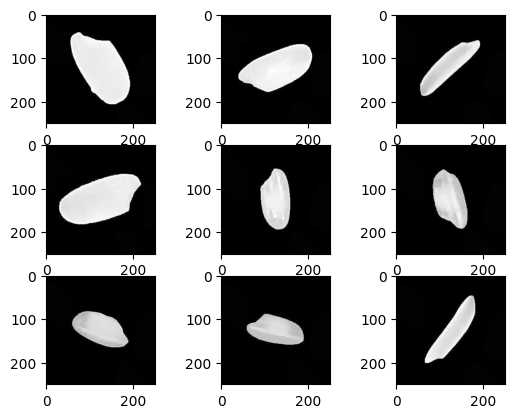

In [28]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(x_train[0].shape)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(class_list), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

d:\Conda\envs\TensorFlow\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 250, 250, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 250, 250, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1000000)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │    64,000,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,021,059 (244.22 MB)

 Trainable params: 64,021,059 (244.22 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 2, batch_size = 64, callbacks=[early_stopping])

Epoch 1/2
38/38 ━━━━━━━━━━━━━━━━━━━━ 248s 6s/step - accuracy: 0.9991 - loss: 0.0137 - val_accuracy: 0.9953 - val_loss: 0.0165
Epoch 2/2
38/38 ━━━━━━━━━━━━━━━━━━━━ 219s 6s/step - accuracy: 0.9957 - loss: 0.0100 - val_accuracy: 0.9993 - val_loss: 0.0032


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


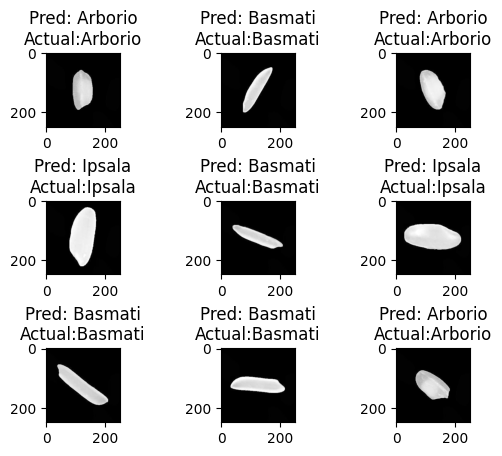

In [35]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i], cmap='gray')
    
    img = np.expand_dims(x_test[i], axis=0)
    prediction = model.predict(img)
    
    plt.title(f"Pred: {class_list[np.argmax(prediction)]}\nActual:{class_list[np.argmax(y_test[i])]}")
    
plt.subplots_adjust(hspace=1)